## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix, references, and information about GitHub and individual contribution will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

**Delete this section from the report, when using this template.** 

## Background / Motivation

We wanted to work on this problem because we all really love the film Titanic. The Titanic was a British passenger ship which sank on April 15, 1912 after colliding with an iceberg. It was one of the largest and most luxurious ships at the time and considered to be a safe and unsinkable ship. It included amenities such as a swimming pool, gymnasium, and multiple dining options for passengers. This explains why the crew was not prepared for disaster; with 2,224 people on board, there was only enough lifeboats for half of the total amount of people, leading to the death of 1,500. The sinking of the Titanic led to significant changes in maritime safety regulations, including requiring ships to carry enough lifeboats for all passengers and crew and improving communication and navigation systems on board. The Titanic's story has been the subject of numerous books, movies, and documentaries, and has become a symbol of human hubris and the dangers of overconfidence in technology.

We would like to explore which people's lives were prioritized in this state of emergency, and which lives were not. This would give valuable insight into the social structure of British and American society during that time.

## Problem statement 

We would like to predict the survival of the passengers on the Titanic based on features of the passengers such as their class, gender, port of embarkation, cabin number, cost of fare, relatives on board, and age. 

This is a classification problem because we want to figure out whether or not the passengers survived, a qualitative response. This is more of an inference problem since we don't want to necessarily predict future deaths of passengers of the Titanic, something that won't happen again, but instead understand how each indepedent variable impacts the likelihood of that passenger dying. 

Since this is a classification problem, we obviously want to minimize the classification error rate, and hopefully achieve a model of at least 95% accuracy. Since we are not using this data to make any future predictions, we aren't necessarily interested in precision, recall, FNR, or TPR.

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

The data we used is a Kaggle dataset found at this link: https://www.kaggle.com/competitions/titanic/data?select=test.csv
<br>
<br>
Our variable of interest is 'Survived' and the rest of the variables were considered as predictors. 
<br> 
<br>
Variable descriptions: 
<br> 
<br>
1. Survived: 0=No, 1=Yes
<br> 
2. Pclass: 1 = first class, 2 = second class, 3 = third class
<br> 
3. sibsp: number of siblings and spouses aboard Titanic
<br> 
4. parch: number of parents and children aboard Titanic
<br> 
5. ticket: ticket number
<br> 
6. fare: passenger fare
<br> 
7. cabin: cabin number
<br> 
8. embarked: port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton


## Stakeholders

We are mostly interested in understanding the background of a historical event, and if certain factors like sex or class could have decided on a person's life. This would help honor the victims of this tragic accident.

Additionally, for someone paranoid and scared of boatrides, it might help them feel prepared if they knew what helped people survive on the Titanic, so they could improve their chances of survival through fare, cabin placement, etc. as well

## Data quality check / cleaning / preparation 

The following variables were discarded as they did not provide any unique data; they were specific to each passenger
- PassengerId
- Name
- Ticket
- Cabin

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
train = pd.read_csv('../train.csv')
train = train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

The frequency for the continuous variables is as follows:

In [96]:
df = train[['Age','Fare']].isnull().sum().reset_index().transpose().append(train[['Age','Fare']].nunique().reset_index().transpose())
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df = df.set_index([pd.Index(['# missing','# unique'])])
train[['Age','Fare']].describe().append(df)

,Age,Fare
count,714.0,891.0
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.42,0.0
25%,20.125,7.9104
50%,28.0,14.4542
75%,38.0,31.0
max,80.0,512.3292
# missing,177,0
# unique,88,248


The frequency table for the categorical variable "Survived":

In [97]:
df1=pd.crosstab(train['Survived'], columns = 'count')
df2=pd.DataFrame(data={'# missing': [0, ' '], '# unique': [2, ' ']}, index=[0, 1])
pd.concat([df1,df2],axis=1)

,count,# missing,# unique
0,549,0,2
1,342,,


The frequency table for the categorical variable "Pclass":

In [98]:
df1=pd.crosstab(train['Pclass'], columns = 'count')
df2=pd.DataFrame(data={'# missing': [0, ' ',' '], '# unique': [3, ' ',' ']}, index=[1,2,3])
pd.concat([df1,df2],axis=1)

,count,# missing,# unique
1,216,0,3
2,184,,
3,491,,


The frequency table for the categorical variable "Sex":

In [99]:
df1=pd.crosstab(train['Sex'], columns = 'count')
df2=pd.DataFrame(data={'# missing': [0, ' '], '# unique': [2, ' ']}, index=['female','male'])
pd.concat([df1,df2],axis=1)

,count,# missing,# unique
female,314,0,2
male,577,,


The frequency table for the categorical variable "SibSp":

In [100]:
df1=pd.crosstab(train['SibSp'], columns = 'count')
df2=pd.DataFrame(data={'# missing': [0,'','','','','',''], '# unique': [7,'','','','','','']}, index=[0,1,2,3,4,5,8])
pd.concat([df1,df2],axis=1)

,count,# missing,# unique
0,608,0,7
1,209,,
2,28,,
3,16,,
4,18,,
5,5,,
8,7,,


The frequency table for the categorical variable "Parch":

In [101]:
df1=pd.crosstab(train['Parch'], columns = 'count')
df2=pd.DataFrame(data={'# missing': [0,'','','','','',''], '# unique': [7,'','','','','','']}, index=[0,1,2,3,4,5,6])
pd.concat([df1,df2],axis=1)

,count,# missing,# unique
0,678,0,7
1,118,,
2,80,,
3,5,,
4,4,,
5,5,,
6,1,,


The frequency table for the categorical variable "Embarked"

In [102]:
df1=pd.crosstab(train['Embarked'], columns = 'count')
df2=pd.DataFrame(data={'# missing': [0,'',''], '# unique': [3,'','']}, index=['C','S','Q'])
pd.concat([df1,df2],axis=1)

,count,# missing,# unique
C,168,0,3
Q,77,,
S,644,,


The only data cleaning necessary for this dataset was the values of Age -- there were 177 missing values, and there was enough information for me to impute them. In order to impute the 177 values of Age, I decided to run a linear regression on all of the other variables and figure out if there was a model that could reliably predict values of Age. Hence, I made a model with Pclass, Sex, SibSp, Parch, Fare, and Embarked. I did some preliminary data analysis on those 6 variables on Age, and found that there was significant correlation between SibSp, Parch, and Pclass, but not Sex or Embarked. This is probably because Sex and Embarked would have a pretty evenly split age groups. The specific correlations can be seen in the Code section. 

To impute the values, I split the entire training dataset into two: one with all of the ages, and one without all of the ages. I ran my multiple linear regression on the dataset with all of the equations. I also edited the dataframe so that the variables SibSp, Parch, and Pclass were strings instead of integers, in order for the model to read them as categorical variables. I found that doing this improved the R-squared of my model drastically. I believe this is because these three variables only have discrete values (you can't have 4.5 siblings). I initially used the formula 'Age~SibSp+Parch+Pclass+Fare', and performed a residual analysis, as I found the R-squared value of 0.302 to be a bit unsatisfactory.

Text(0, 0.5, 'Residuals')

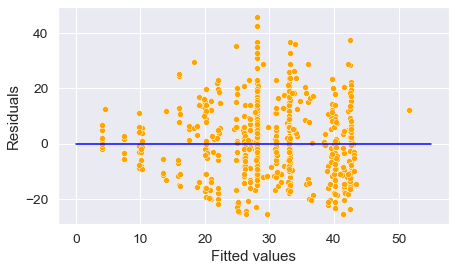

In [117]:
train['Pclass'] = train['Pclass'].apply(str)
train['Parch'] = train['Parch'].apply(str)
train['SibSp'] = train['SibSp'].apply(str)
missing_age = train[train['Age'].isna()] #dataframe containing only rows missing Age
has_age = train.dropna(subset=['Age']) #dataframe containing only no rows missing Age
ols_object = smf.ols(formula = 'Age~SibSp+Parch+Pclass+Fare', data = has_age)
model = ols_object.fit()
plt.rcParams["figure.figsize"] = (7,4)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [0,55],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Here, you can clearly see that the constant variance assumption is violated, and hence we must take a transformation of the response variable. I found that taking the square-root of age was able make the variance of the residuals a bit more constant.
Doing so improved the R-squared of this model to 0.349. As a last step, I checked to see if there were a need to remove any outliers, high leverage points, and influential points. I found 4 outliers, 35 high leverage points, and no influential points. Because there were no influential points, I decided not to remove any data from the model.

Text(0, 0.5, 'Residuals')

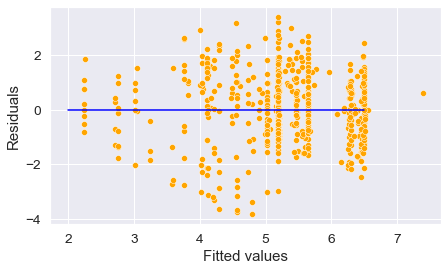

In [118]:
ols_object = smf.ols(formula = 'np.sqrt(Age)~SibSp+Parch+Pclass+Fare', data = has_age)
model_sqrt_age = ols_object.fit()
plt.rcParams["figure.figsize"] = (7,4)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model_sqrt_age.fittedvalues, y=model_sqrt_age.resid,color = 'orange')
sns.lineplot(x = [2,6.5],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

With this final model now set, I was now ready to impute the data on the part of the dataset that did not have values of Age. However, I immediately ran into an issue -- 7 datapoints had "SibSp" values of 8, but my model could only predict Ages of those with "SibSp" values from 0 to 5. Since "SibSp" has to do with the number of siblings and spouses, I hypothesized that the people who had a "SibSp" of 8 probably belonged to the same large family. I looked for these values in the dataframe and was correct! They call came from the Sage family.

In [119]:
train = pd.read_csv('../train.csv')
missing_age = train[train['Age'].isna()]
missing_age.loc[missing_age['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Since there were so few values, I decided to see if I could do enough historical research to hand impute these values. Indeed, I was able to find the birth years of all of the passengers, due to the fact that this historical event has a lot of research and archived materials. I was able to find: Stella (born 1891), George John (born 1892), Douglas Bullen (born 1894), Frederick (born 1895), Dorothy Florence (born 1897), Anthony William (born 1899), Elizabeth Ada (born 1901), Constance Gladys (born 1904), and Thomas Henry (born 1911). [1] With the fact that the Titanic sank in 1912, I was able to figure out their ages! 

## Exploratory data analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

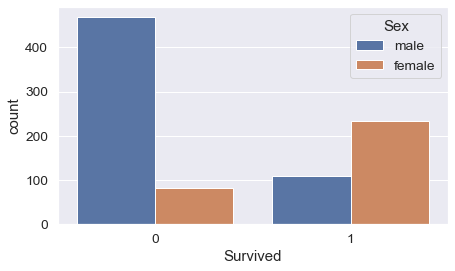

In [122]:
sns.countplot(x='Survived',data=train,hue='Sex')

From this, we find that the majority of people who died are men, and the majority of people who survived are female

<AxesSubplot:xlabel='Survived', ylabel='count'>

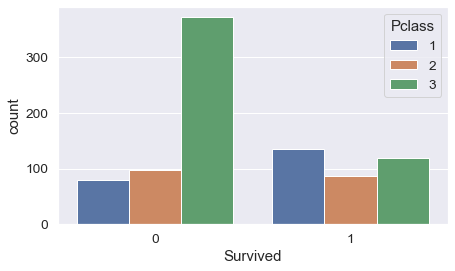

In [124]:
sns.countplot(x='Survived',data=train,hue='Pclass')

From this, we see that the majority of people who died was in the third class, but those who survived seem pretty evenly split between all classes

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

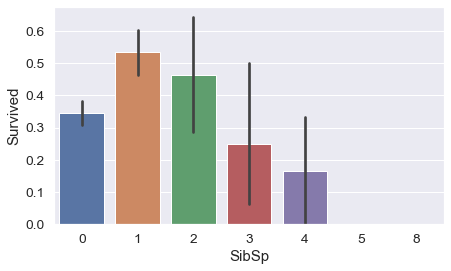

In [125]:
sns.barplot(x='SibSp',y='Survived',data=train)

From this, we find that smaller families are more likely to survive than larger families

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

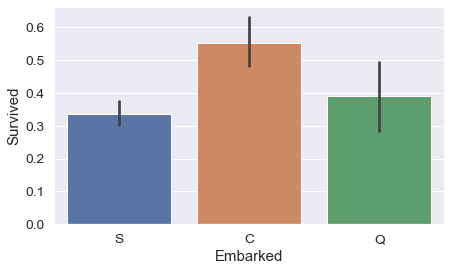

In [128]:
sns.barplot(x='Embarked',y='Survived',data=train)

From this, we find that there is some variation on survival rate based on which city they embarked on, which may be due to a correlation with class.

In [131]:
#Binning Age
binned_age = pd.cut(train['Age'],8,retbins=True)
train['age_binned'] = binned_age[0]
age_data = train.groupby('age_binned')['Survived'].agg([('survival_percent','mean'),('nobs','count')]).reset_index(drop=False)
age_data

,age_binned,survival_percent,nobs
0,"(0.34, 10.368]",0.593750,64
1,"(10.368, 20.315]",0.382609,115
2,"(20.315, 30.263]",0.365217,230
3,"(30.263, 40.21]",0.445161,155
4,"(40.21, 50.158]",0.383721,86
5,"(50.158, 60.105]",0.404762,42
6,"(60.105, 70.052]",0.235294,17
7,"(70.052, 80.0]",0.200000,5


Text(0.5, 0, 'Age_bin')

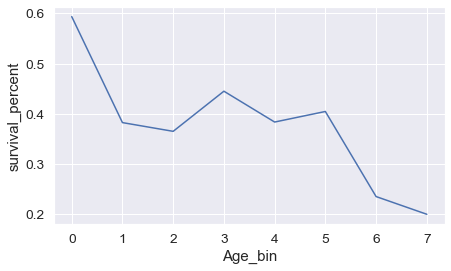

In [132]:
#Visualizing percentage of people having diabetes with increasing Age (or Age bins)
sns.lineplot(x = age_data.index, y= age_data['survival_percent'])
plt.xlabel('Age_bin')

From here, we find that the older the passenger, the less likely they were able to survive.

## Approach

What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? Did the very first model you tried work? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

We chose to use a logistic model, as we were performing a classification task. As we developed this model, we chose to optimize overall accuracy, as the purpose of this analysis is to gain insight into the factors that lead to survival or death in these circumstances. If this were a more modern or common distaster it may be useful to use this information to inform modern ships about survival risks, but due to the unique circumstances and era we simply seek to understand the factors contributing to survival for this specific situation, leading to the pursuit of overalll accuracy. It is important to note that we also sought to balance the precision and recall for both factors, as we had a relatively high proportion of the data belonging to a single category (65% fatality rate)

After data cleaning and imputation, early modeling efforts focused on first identifying factors that, on their own, were significant predictors of survival. Here we first encountered a problem then would endure throughout our analysis: a significant quantity of cateorical data, for which it was difficult to isolate the impact and compare to numerical data. To get a better general understanding of our variables and identify what could ask as the bases of our model we first made single variable logistic regression for each of our variables, as shown below. 

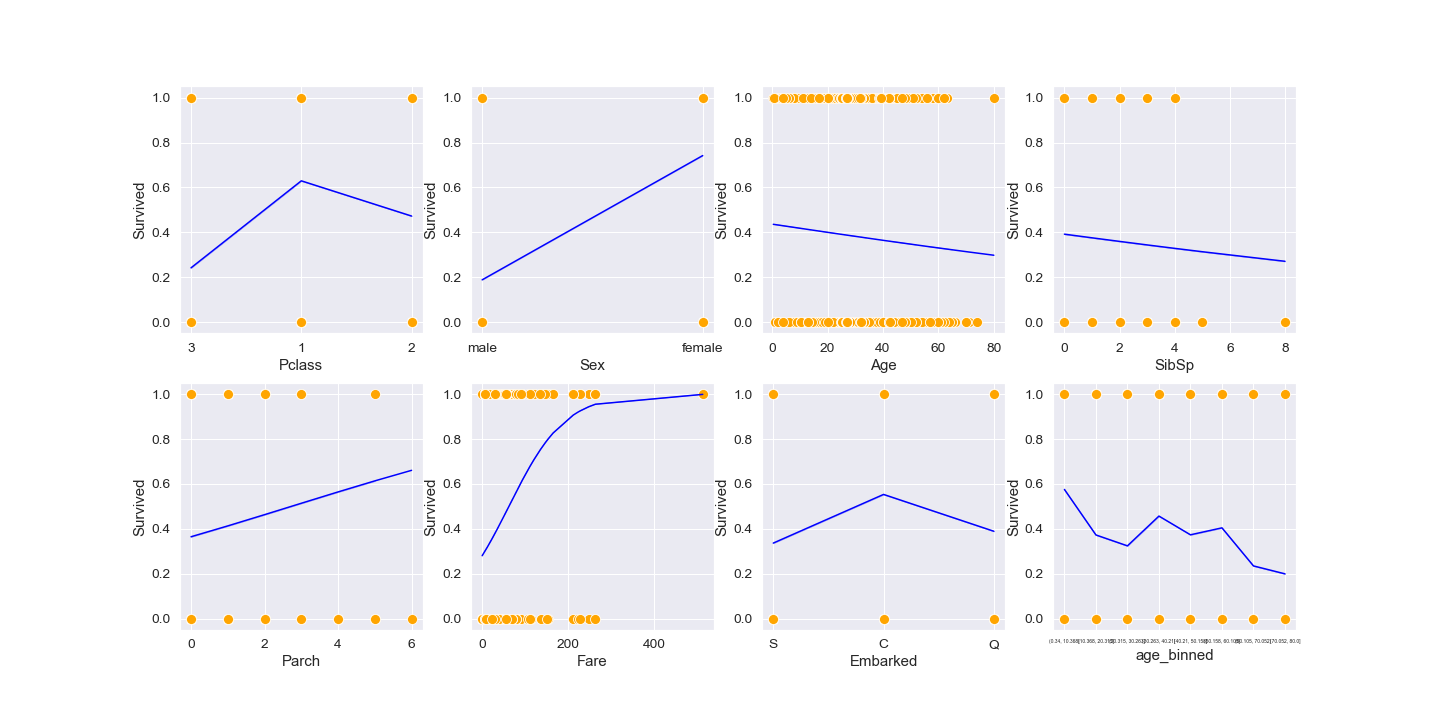

In [5]:
from IPython.display import Image
Image(filename='preliminary.png') 

As shown below, there are several factors that appear to have a significant correlation with survival rate, with sex being the most powerful. Sex as a solo variable cound be considered our first model and although it does have a high correlation, there are many other effects clearly at play - both SibSp and Parch, measures of family size, have significant (and opposite) efects. Fare and class, both a measure of the socioeconomic standing of the passenger, have higher survival at high fare/high class. The age variable shows higher survival at lower age, but the binned age variable shows that this is inconsistant among age groups, and primarily applies to the young. The next step was to integrate multiple variables together. The plot below shows all possible combination of variables (with no interaction), by their pseudo r-squared, the first metric we considered.

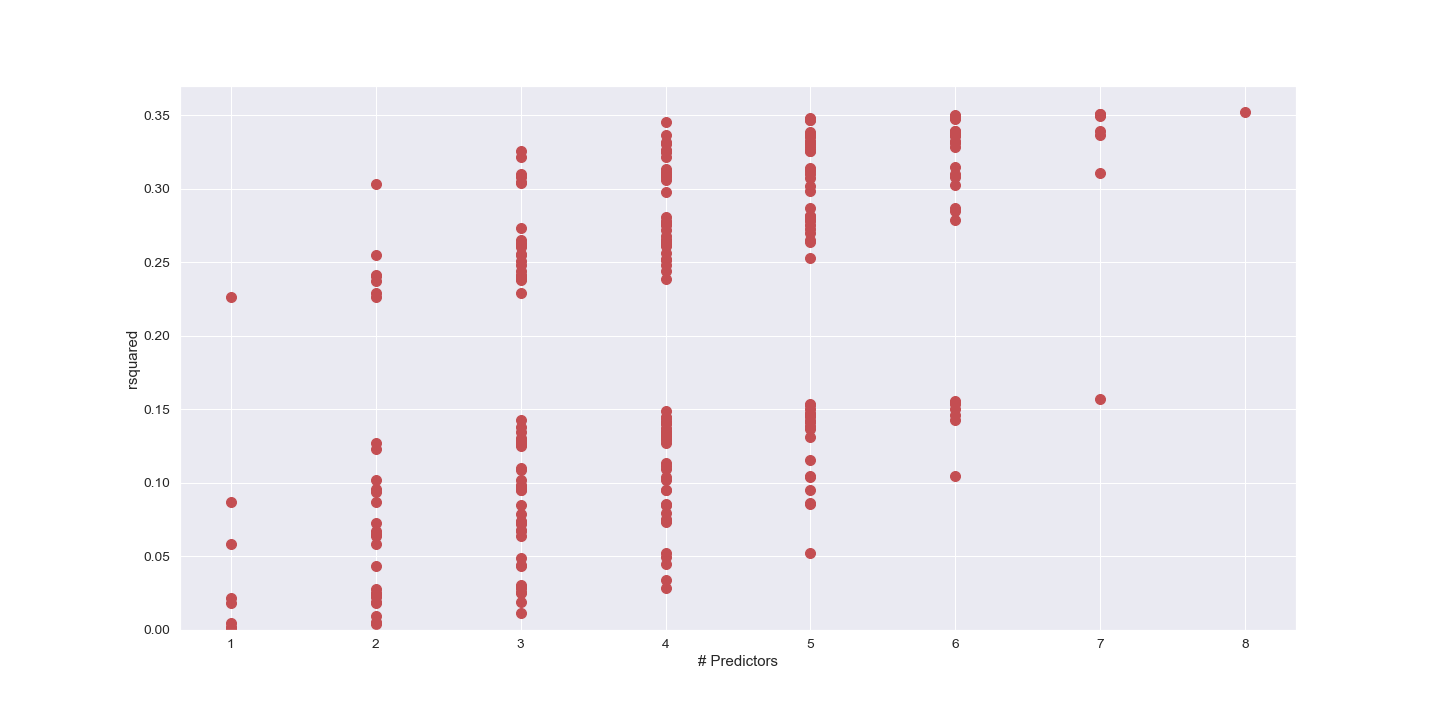

In [6]:
Image(filename='rsquared_all_models.png') 

This process re-emphasized the imapact of sex as a predictor, with all models in the top group (pseudo rsquared > 0.2) including sex as a predictor, and all below lacking. Here we can see that there were diminishing returns of best model rsquared after 4 predictors were included. Further analysis while developing the model will use metrics such as RSS to focus in on the best model in this range. 

Overall, we beleive we took a relatively standard approach to this problem, drawing form the work we did throughout or course material, this being the only major source of code. We adapted out work down with linear regression variable selection to perform this variable selection for classification, making changes when needed, keeping it in a format that was accessible to continued evauation of models. This is an active kaggle prediction problem, and the posted code generally was very preliminary analysis that had scores falling short of the results of our analysis, thus we did not draw from this as a source. Although there were entries in the competitions with scores as high as 1, their code was not avaialable and thus we were not able to learn what approaches had been used to reach new thresholds of accuracy. 

## Developing the model

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

**Put the final model equation**.

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

Our first approach was to develop a basic model with variables found to have a relationship with the target variable based on the EDA and data processsing. This model included the following predictors: Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + age_binned. From the model summary, it appeared that many of the predictors were insignificant despite the model's LLR-pvalue being indicating model significance. 

Before moving on to improving the model, we used Sklearn train_test_split to test the classification accuracy of the data as a reference point for future models. The resulting classification accuracy was 0.7910.

The first steps we took to improve the model was to run best subset exhaustive feature selection on our data. **TALK ABOUT THIS HERE**. We discovered that these 6 predictors are the most significant predictors: Pclass, Age, SibSp, Parch, Embarked, Sex and the resulting classification accuracy was 0.7985.

This feature selection increased the model accuracy and gave us a smaller subset of predictors to further observe. Next, we decided to perform variable transformations on this subset of predictors to futher maximize the classification accuracy.

We included three variable transformations in our model. The first transformation was between the variables SibSp and Parch. Both of these variables describe family relationships and both count members of family members. Since they measure very similar things which also rely on each other, creating an interaction term made sense and seemed to improve the classification accuracy of our model.

The second variable transformation we included in our model was between class and point of embarkation. This transformation was included based on the distribution of class and embarkation observed in the following countplot. **INCLUDE COUNTPLOT HERE** 

The final variable transformation we included in our model was between class and age. We suspected that age and class may have a significant relationship because we anticipated that older individuals may have more wealth than younger individuals. To further back up this intution, we observed the correlations between these two variables, which was roughly 0.45. After including this transformation, we saw a further increase in the classification accuracy. 

We succeeded in achieving our goal because the classification accuracy increased. **ADD MORE STUFF HERE**


**MIGHT NEED TO ADD SOME CODE HERE?**


**INCLUDE FINAL MODEL EQN**
The final model equation: 

## Limitations of the model with regard to inference / prediction

If it is inference, will the inference hold for a certain period of time, for a certain subset of population, and / or for certain conditions.

If it is prediction, then will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

As we are looking at a historical event for this inference task, this inference can only be expected to hold in that particular era, with the particular combination of high and low class citizens that was found aboard the RMS titanic. Upon completing analysis, however, it becomes clear that the cultural differences between now and then are likely not extreme; although the world has changed significantly in the 111 years since the sinking of the titanic, many cultural values remian. We would stil expect women and children to be prioritized in a survival situation, with those values still ingrained in our culture. It is likely that class would play a role, although hopefully our society has developed enough to have better equity in this regard. 

Although our inference is specialized to this unique place and time, the cultural insights are applicable even now, and it would be fascinating to find similar data for modern day disasters and determine how many of these values remain. As long as these western values (women and children, class) persist our inference still has some connection to the modern day, and I do not think it can be considered obsolete. 

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

As we are analyzing a historical event, we do not have any recommendations to present as there are no stakeholders that would significantly benefit from our insights. 

In terms of conclusions, out optimized logistic model summary shows the factors that were the most impactful. The first thing that stands out, as it did throughout our analysis, was the impact of sex on survival. The coefficient for male was -2.7381, with a p-value rounding to ~0. This shows the that the stereotypical prioritization of women in survival situtations is historically accurate, with female survival rate being significantly higher. The second thing, that once again was in line with our expectations, was the dependance on class. The intercept coefficent, corresponding to class 1 passengers, has coefficent of 4.0693 with a p-value ~0 showing that the upper class passengers where able to survive at a significantly higher rate, especially compared to 3rd class (ceof = -1.9166, pval = 0.009). Interestingly the second class coefficient was not singificant, highlighting the gap between the highest and lowest class.

Another aspect that we expected to be significant was Age, to emphasize the expression 'women and children first' that was frequently stated in the movie, and is stereotypical of emergency situations even today. We were able to find a significant decrease in survival with Age (pval = 0.008), but the coefficient was just -0.0349, a lower impact than expected. Bucketing age did not appear useful, although in early analysis showed that this trend (lower survival with age) is not consistent across age groups. Another factor that may give insight into this area is the factors SubSp, and Parch, which show the number of siblings aboard and number of parents and children. The former was shown to have a moderate impact of -0.3319, with a pvalue 0.004. This indicates that larger families (children on board with more siblings) had more difficulty surviving, potentiall skewing the age to have less impact than expected. 

Other factors lead to improved modeling outcomes, but did not carry significant in the model, making their impact less intuitive to understand. In general our analysis found that the stereotypical prioritization of women and children appears to exist, but gender seems to be a much larger predictor than age. Class was shown to be second only to gender, showing how even in crisis, those with higher class are able to secure better outcomes. These factors give insight into human nature, and confirm many aspects of people are traditional thought to react in emergencies. 

Overall, our model stil has shortcomings, with a recall of just 0.68, showing the difficulty in correctly identifying survived passengers when a clear majority did not survie, and in an emergency situation things are inherently unpredictable, to a degree. If this model were to be improved further, the focus would be on the precisions and recall for the survival values, as those are the minority. 

## GitHub and individual contribution {-}

Github link: https://github.com/davenator-git/Data_Science_303-2_Venator/tree/main

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Jazmyn Lu</td>
    <td>Data cleaning and EDA</td>
    <td>Cleaned data to impute missing values and developed visualizations to identify appropriate variable transformations.</td>
    <td>###</td>
  </tr>
  <tr>
    <td>David Venator</td>
    <td>Variable Selection </td>
    <td>describe what you did here davenator</td>
    <td>###</td>
  </tr>
    <tr>
    <td>Hiba Khatib and Emily Leibfritz</td>
    <td>Exhaustive Variable Selection, minimal data cleaning, fitting models, performance measurement</td>
    <td>describe stuff here</td>
    <td>###</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

David: It can challenging when working on related things - when people are working on the same thing it may lead to git conflicts and it is difficult to to determine what to keep. 

## References {-}

[1] The National Archives, “Stories from the Titanic - Safe Family,” 01-Mar-2012. [Online]. Available: https://www.nationalarchives.gov.uk/titanic/stories/sage-family.htm. [Accessed: 3-Mar-2023]. 

## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.